In [3]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import timeit
import time
from multiprocessing import Pool
import numpy as np
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

In [4]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
significant_cores3={}
PAPERS_TOGETHER=3

for gsize in range(2,10):
    print(gsize,end='\r')
#     with open(path_career+'significant_cores3_size'+str(gsize)+'_v2.pkl', 'rb') as f:
    with open(path_career+'significant_cores3_size'+str(gsize)+'(whole).pkl', 'rb') as f:
        significant_cores3[gsize]=pickle.load(f) 
    significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>PAPERS_TOGETHER]
    significant_cores3[gsize]['size']=gsize

# calc formation of cores

In [3]:
# dict_pairs_firstpubtogether
with open(path_career+'dict_pairs_firstpubtogether.pkl', 'rb') as f:
    dict_pairs_firstpubtogether=pickle.load(f)

In [4]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 
auth_to_firstpubyear=dict_firstpub

In [5]:
with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubdate=pickle.load(f)

In [ ]:
for gsize in range(2,10):
    t_ic = time.time();

    print(gsize,end='\r')
    group=list(significant_cores3[gsize]['group'])

    Age1=[];Age2=[]
    sfirstpubtogether=[]
    smem_first=[]
    for it_auth in range(len(group)):
#         print(it_auth/len(group),end='\r')
        mem_first=[]
        firstpubtogether=[]
        a=group[it_auth]
        for ii in range(len(a)):
            try:
                mem_first.append(int(dict_firstpub[a[ii]]))
            except:
                mem_first.append(np.nan)
            for ii2 in range(ii+1,len(a)):
                if a[ii2] in dict_pairs_firstpubtogether[a[ii]].keys():
                    firstpubtogether.append(dict_pairs_firstpubtogether[a[ii]][a[ii2]]['first_year_together']);
                else:
                    firstpubtogether.append(np.nan)
#             ages=[firstpubtogether-firstA1,firstpubtogether-firstA2];ages=sorted(ages)
#             Age1.append(ages[0]);Age2.append(ages[1]);

        sfirstpubtogether.append(firstpubtogether)
        smem_first.append(mem_first)

        if (it_auth+1)%100==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(gsize)+'--- ',str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

#     significant_cores3[gsize]['sfirstpubtogether']=sfirstpubtogether
    significant_cores3[gsize]['member_first_pub']=smem_first
    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(sfirstpubtogether, f)  
    with open(path_career+'smember_first_pub'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(smem_first, f)

# Auth to cores

In [ ]:
dictauthcores={}
for gsize in range(2,10):
    print(gsize,end='\r')
    significant_cores3[gsize]

    groups=list(significant_cores3[gsize]['group'])
    t_ic = time.time();
    for it in range(len(groups)):
        for auth in groups[it]:
            try:
                dictauthcores[auth].append([gsize,it,groups[it]])
            except:
                dictauthcores[auth]=[[gsize,it,groups[it]]]

        if (it+1)%100==0:
            t_oc = time.time();
            frac=(it/len(groups))
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

In [ ]:
with open(path_career+'dictauthcores.pkl', 'wb') as f:
    pickle.dump(dictauthcores, f)  
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_auth_to_paper(whole).pkl', 'rb') as f:
    dict_auth_to_paper=pickle.load(f)
    

In [141]:
with open(path_career+'dict_paper_to_auth(whole).pkl', 'rb') as f:
    dict_paper_to_auth=pickle.load(f)
    

In [ ]:
len(dictauthcores)/len(dict_auth_to_paper)

# Papers shared

In [ ]:
t_ic = time.time();

for gsize in range(2,10):
    t_ic = time.time();
    path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
    
    print(gsize)
    papers_shared=[]
    ind_papers_shared=[0]
    ind_=0
    it=0

    for group in significant_cores3[gsize]['group']:
        
        for auth in group:
            papersinquestion=dict_auth_to_paper[auth]
            y=[]
            for p in papersinquestion:
                pauths=dict_paper_to_auth[p]
                if len(set(pauths).intersection(group))==len(group):
                    y.append(p)

        papers_shared.append(y)
        ind_=ind_+len(y)
        
        it=it+1
        if it%100==0:
            t_oc = time.time();
            frac=(it/len(significant_cores3[gsize]['group']))
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

    papers_shared=[list(x) for x in papers_shared]    
    
    if len(papers_shared)>0:
        A=np.concatenate(papers_shared)
    else:
        A=[]
    B=[len(x) for x in papers_shared]
    C=np.cumsum(B)
    C=np.insert(C,0,0)
    print('\n',len(C),'\n')
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(A, f)  
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_ind.pkl', 'wb') as f:
        pickle.dump(C, f)    

# pub years + sorting papers

In [ ]:
import pickle
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubyear=pickle.load(f) 
paper_to_pubyear=dict_pubyear;

In [ ]:
t_ic = time.time();
for gsize in range(2,10):

    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_ind.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    pub_years=[paper_to_pubyear[x]  if x in paper_to_pubyear.keys() else 0 for x in papers_by_team]
    pub_years=np.array(pub_years)

    for n in range(len(I)-1):

        a=papers_by_team[I[n]:I[n+1]]
        b=pub_years[I[n]:I[n+1]]
        z=sorted(zip(b,a))
        zpapers = [x for _,x in z]
        zyears=[_ for _,x in z]
        papers_by_team[I[n]:I[n+1]]=zpapers
        pub_years[I[n]:I[n+1]]=zyears

        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(papers_by_team, f)  
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_years, f)  
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'wb') as f:
        pickle.dump(I, f)  

# GeoDiversity: Rao stirling diverisity 

In [ ]:
def calculate_rao_stirling(team_affiliations):
    """
    Calculate the Rao-Stirling diversity for a single team based on their affiliations.
    """
    # Function to calculate the Jaccard similarity between two sets
    def jaccard_similarity(set1, set2):
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union else 1
    
    # Ensure all affiliations are in set form for consistency
    affiliation_sets = [set(aff) if isinstance(aff, list) else set([aff]) for aff in team_affiliations]
    
    # Calculate the pairwise Jaccard similarities for each unique pair of affiliations
    pairwise_similarities = [jaccard_similarity(pair[0], pair[1]) for pair in itertools.combinations(affiliation_sets, 2)]
    
    # Calculate the Rao-Stirling diversity
    # Note: Assuming equal weight for each affiliation here (pi = 1/n for all i)
    # For a different distribution of weights, we would need to adjust the calculation.
    n = len(team_affiliations)
    pi = 1 / n
    diversity = sum((1 - similarity) * pi * pi for similarity in pairwise_similarities)
    
    return diversity

# # Example of how to use the function with a team input
# team_input = ["U30", "U31", "U32", "U33"] # Example team with no shared affiliations
# rao_stirling_diversity_score = calculate_rao_stirling(team_input)
# rao_stirling_diversity_score

In [ ]:
with open(path_career+'country_to_continent.pkl', 'rb') as f:
    country_to_continent=pickle.load(f) 

In [ ]:
with open(path_career+'dict_paper_auth_geo.pkl', 'rb') as f:
    dict_paper_auth_geo=pickle.load(f) 

In [ ]:
geodiversities_countries={}
geodiversities_continents={}
for gsize in range(2,10):
    
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])

    geodiversities_countries[gsize]=[]
    geodiversities_continents[gsize]=[]
    for n in range(len(I)-1):
        print(round(n/len(papers_by_team),3),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
        teamcore=list(teamcores[n])
        countries_coresizexPapers=[[dict_paper_auth_geo[paper][auth] for auth in teamcore] for paper in papersbyteam]
        countries_coresizexPapers

        continents=[[[country_to_continent.get(z) for z in y] for y in x] for x in countries_coresizexPapers]
        geodiversitycountries=[calculate_rao_stirling(x) for x in countries_coresizexPapers if False not in [len(y)>0 for y in x]]
        geodiversitycontinents=[calculate_rao_stirling(x) for x in continents if False not in [len(y)>0 for y in x]]
        geodiversities_countries[gsize].append(np.mean(geodiversitycountries))
        geodiversities_continents[gsize].append(np.mean(geodiversitycontinents))



In [ ]:

with open(path_career+'geodiversities_countries.pkl', 'wb') as f:
    pickle.dump(geodiversities_countries, f) 
with open(path_career+'geodiversities_continents.pkl', 'wb') as f:
    pickle.dump(geodiversities_continents, f) 

In [62]:
with open(path_career+'geodiversities_countries.pkl', 'rb') as f:
    geodiversities_countries=pickle.load(f) 
with open(path_career+'geodiversities_continents.pkl', 'rb') as f:
    geodiversities_continents=pickle.load(f) 

In [63]:

for gsize in range(2,8):
    print(gsize, np.count_nonzero(~np.isnan(geodiversities_countries[gsize]))/len(geodiversities_countries[gsize]))

2 0.8186596370928615
3 0.8532286837698114
4 0.842121712218864
5 0.7677377072728415
6 0.686861188831154
7 0.6390447187049206


In [67]:
x=[]
for gsize in range(2,8):
    fgeodivNOTnan=np.array(geodiversities_countries[gsize])[~np.isnan(geodiversities_countries[gsize])]
    print(gsize, round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1),'% cores: all members same country')
    x.append(round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1))
print(np.mean(x))

2 79.0 % cores: all members same country
3 78.4 % cores: all members same country
4 78.2 % cores: all members same country
5 77.3 % cores: all members same country
6 77.9 % cores: all members same country
7 78.0 % cores: all members same country
78.13333333333334


In [69]:
x=[]
for gsize in range(2,8):
    fgeodivNOTnan=np.array(geodiversities_continents[gsize])[~np.isnan(geodiversities_continents[gsize])]
    print(gsize, round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1),'% cores: all members same continent')
    x.append(round(100*np.sum(fgeodivNOTnan==0)/len(fgeodivNOTnan),1))
print(np.mean(x))

2 85.4 % cores: all members same continent
3 85.1 % cores: all members same continent
4 84.8 % cores: all members same continent
5 84.3 % cores: all members same continent
6 84.7 % cores: all members same continent
7 84.0 % cores: all members same continent
84.71666666666667


In [ ]:
# Define the teams
teams = {
    'A': ['U1', 'U1', 'U1'],
    'B': ['U2', 'U2', ['U2', 'U3']],
    'C': ['U4', 'U5', ['U4', 'U5', 'U6']],
    'D': ['U4', 'U5', ['U5', 'U6']],
    'E': ['U7', 'U8', 'U9'],
    'F': ['U10', 'U10', ['U10', 'U11']],
    'G': ['U12', ['U12', 'U13'], ['U12', 'U13']],
    'H': ['U14', ['U14', 'U15'], ['U14', 'U15', 'U16']],
    'I': ['U17', 'U17', 'U17'],
    'J': ['U18', 'U19', 'U20']
}

teams.items()
# Calculate Rao-Stirling diversity for each team
rao_stirling_scores = {team+str(affiliations): calculate_rao_stirling(affiliations) for team, affiliations in teams.items()}

# Sort teams by increasing order of diversity
sorted_teams_by_diversity = sorted(rao_stirling_scores.items(), key=lambda item: item[1])

sorted_teams_by_diversity, 
# rao_stirling_scores

# University : Minimum spanning set and Rao sterling diversity calculation

In [76]:
with open(path_career+'dict_paper_auth_university.pkl', 'rb') as f:
    dict_paper_auth_university=pickle.load(f) 

In [79]:
# calc of minimal set of unis which spans all members of core
from itertools import combinations

def minimal_affiliation_set(members_affiliations):
    """
    Finds a minimal set of affiliations that intersects with each member's affiliations.
    
    :param members_affiliations: list of list with each item corresponding to a members thier affiliations as values of the sub list.
    :return: Set of affiliations.
    """
    members_affiliations={x:y  for x,y in zip(range(len(members_affiliations)),members_affiliations) if len(y)>0} 
    # Extract all unique affiliations
    all_affiliations = set(aff for affs in members_affiliations.values() for aff in affs)

    # Function to check if a set of affiliations covers all members
    def covers_all(selected_affiliations):
        return all(any(aff in selected_affiliations for aff in affs) for affs in members_affiliations.values())

    # Try combinations of all sizes until we find the minimal one that covers all members
    for i in range(1, len(all_affiliations) + 1):
        for combo in combinations(all_affiliations, i):
            if covers_all(set(combo)):
                return len(set(combo))

    return 0  # Return an empty set if no combination found (should not happen in correct input)

# Test examples
test_cases = [
    {"Alice": ["Math", "Physics"], "Bob": ["Physics", "Chemistry"], "Charlie": ["Biology", "Math"]},
    {"Member1": ["GroupA", "GroupB"], "Member2": ["GroupB"], "Member3": ["GroupC", "GroupA"]},
    {"User1": ["TeamX", "TeamY"], "User2": ["TeamY", "TeamZ"], "User3": ["TeamX"], "User4": ["TeamZ"]}
]

# minimal_affiliation_set(test_cases[0])


In [147]:
MinSpanningAffilSet={}
MinSpanningAffilSet_firstpaper={}
MinSpanningAffilSet_lastpaper={}
from scipy import stats

for gsize in range(2,10):
    MinSpanningAffilSet[gsize]=[]
    MinSpanningAffilSet_firstpaper[gsize]=[]
    MinSpanningAffilSet_lastpaper[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])

    for n in range(len(I)-1):
        print(round(n/len(papers_by_team),3),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
        teamcore=list(teamcores[n])
        universities_coresizexPapers=[[dict_paper_auth_university[paper][auth] for auth in teamcore] for paper in papersbyteam]
        x=[minimal_affiliation_set(universities_coresizexPapers[it]) for it in range(len(universities_coresizexPapers))]
#         MinSpanningAffilSet[gsize].append(stats.mode(x))

        MinSpanningAffilSet_firstpaper[gsize].append(x[0])
        MinSpanningAffilSet_lastpaper[gsize].append(x[len(x)-1])
        x=np.array(x); x=x[x>0];
        if len(x)>0:
            MinSpanningAffilSet[gsize].append(np.min(stats.mode(x)))
        else:
            MinSpanningAffilSet[gsize].append(np.nan)


2
3.078
4.127
5.182
6.202
7.201
8.193
9.185


In [148]:
with open(path_career+'universitiesMinSpanningAffilSet_mode.pkl', 'wb') as f:
    pickle.dump(MinSpanningAffilSet, f) 

In [ ]:
with open(path_career+'universitiesMinSpanningAffilSet_birth.pkl', 'wb') as f:
    pickle.dump(MinSpanningAffilSet_firstpaper, f) 
with open(path_career+'universitiesMinSpanningAffilSet_death.pkl', 'wb') as f:
    pickle.dump(MinSpanningAffilSet_lastpaper, f) 

In [73]:
with open(path_career+'universitiesMinSpanningAffilSet.pkl', 'rb') as f:
    MinSpanningAffilSet=pickle.load(f) 

In [ ]:
unidiversities={}

for gsize in range(2,10):
    
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])

    unidiversities[gsize]=[]
    for n in range(len(I)-1):
        print(round(n/len(papers_by_team),3),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
        teamcore=list(teamcores[n])
        universities_coresizexPapers=[[dict_paper_auth_university[paper][auth] for auth in teamcore] for paper in papersbyteam]

        unidiversities_=[calculate_rao_stirling(x) for x in universities_coresizexPapers if False not in [len(y)>0 for y in x]]
        unidiversities[gsize].append(np.mean(unidiversities_))



In [ ]:
with open(path_career+'unidiversities.pkl', 'wb') as f:
    pickle.dump(unidiversities, f) 

In [ ]:
for gsize in range(2,7):
    X=np.array(unidiversities[gsize])[~np.isnan(unidiversities[gsize])]
    print(gsize, round(100*np.sum(X==0)/len(X),1),'% cores: all members same institution')

## University: Span [w Non core]

In [145]:
import time 
t = time.time()
# do stuff

MinSpanningAffilSet_perpaper={}
for gsize in range(2,10):
    MinSpanningAffilSet_perpaper[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])

    for n in range(len(teamcores)-1):
        elapsed = time.time() - t

        print(str(round(n/len(teamcores),3)) + ', hours remaining: '+str(round((elapsed/((n+1)/len(teamcores))/3600),4)),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
#         teamcore=list(teamcores[n])
        allauths=[dict_paper_to_auth[paper] for paper in papersbyteam]
        for team in allauths:
            universities_coresizexPapers=[[dict_paper_auth_university
                                            [paper].get(auth,[]) for auth in team] for paper in papersbyteam]
            x=[minimal_affiliation_set(universities_coresizexPapers[it]) for it in range(len(universities_coresizexPapers))]
            x=np.array(x); x=x[x>0];
#             MinSpanningAffilSet_perpaper[gsize].append(stats.mode(x))

            if len(x)>0:
                MinSpanningAffilSet_perpaper[gsize].append(np.min(stats.mode(x)))
            else:
                MinSpanningAffilSet_perpaper[gsize].append(np.nan)

2
3.0hours remaining: 0.223738
4.0hours remaining: 0.39515123
5.0hours remaining: 0.491618988
6.0hours remaining: 0.52838667
7.0hours remaining: 0.54010457
8.0hours remaining: 0.54515363
9.0hours remaining: 0.54798156


In [182]:
import time 
t = time.time()
# do stuff

teamsizes={}
for gsize in range(2,10):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])
    teamsizes[gsize]=[]
    for n in range(len(teamcores)-1):
        elapsed = time.time() - t

        print(str(round(n/len(teamcores),3)) + ', hours remaining: '+str(round((elapsed/((n+1)/len(teamcores))/3600),4)),end='\r')
        papersbyteam=papers_by_team[I[n]:I[n+1]]
#         teamcore=list(teamcores[n])
        allauths=[dict_paper_to_auth[paper] for paper in papersbyteam]
        teamsizes[gsize].append(len(allauths))
       

2
3.0, hours remaining: 0.006969
4.0, hours remaining: 0.0146469
5.0, hours remaining: 0.0202027
6.0, hours remaining: 0.0226269
7.0, hours remaining: 0.0233332
8.0, hours remaining: 0.0235366
9.0, hours remaining: 0.0236367


In [146]:
with open(path_career+'universitiesMinSpanningAffilSetwNonCore.pkl', 'wb') as f:
    pickle.dump(MinSpanningAffilSet_perpaper, f) 

In [ ]:
# with open(path_career+'universitiesMinSpanningAffilSetwNonCore', 'rb') as f:
#     universitiesMinSpanningAffilSetwNonCore=pickle.load(f) 

In [186]:
for gsize in range(2,10):
    teamsizes[gsize]=np.array(teamsizes[gsize])
    MinSpanningAffilSet_perpaper[gsize]=np.array(MinSpanningAffilSet_perpaper[gsize])

In [187]:
t = time.time()
MinSpanningAffilSet_perpaper_percore={}
samplesize={}
for gsize in range(2,10):
    samplesize[gsize]=[]
    MinSpanningAffilSet_perpaper_percore[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize)
    
    teamcores=list(significant_cores3[gsize]['group'])
    for n in range(len(teamcores)):
        elapsed = time.time() - t

        print(str(round(n/len(teamcores),3)) + ', hours remaining: '+str(round((elapsed/((n+1)/len(teamcores))/3600),4)),end='\r')
        
        ind=np.where(np.array(teamsizes[gsize][I[n]:I[n+1]])>gsize)[0]
        
        X=MinSpanningAffilSet_perpaper[gsize][I[n]:I[n+1]][ind]
        X=X[~np.isnan(X)]
        samplesize[gsize].append(len(ind)) 
        MinSpanningAffilSet_perpaper_percore[gsize].append(X) 

2
3.0, hours remaining: 0.005252
4.0, hours remaining: 0.0121214
5.0, hours remaining: 0.0175758
6.0, hours remaining: 0.0198984
7.0, hours remaining: 0.0206069
8.0, hours remaining: 0.0208086
9.0, hours remaining: 0.0209096


In [234]:
np.mean(np.array(samplesize[4])>0)*100
MinSpanningAffilSet_percore={}
for gsize in range(2,10):
#     MinSpanningAffilSet_percore[gsize]=[stats.mode(x)[0][0] if len(x)>0 else np.nan for x in MinSpanningAffilSet_perpaper_percore[gsize]]
    MinSpanningAffilSet_percore[gsize]=[np.mean(x) if len(x)>0 else np.nan for x in MinSpanningAffilSet_perpaper_percore[gsize]]

In [212]:
# MinSpanningAffilSet_percore[2]

In [235]:
len(MinSpanningAffilSet_percore[2])

247336

In [236]:
MinSpanningAffilSet_perpaper_percore[2][0]

array([], dtype=float64)

In [237]:
len(MinSpanningAffilSet[2])

247336

In [238]:
Z=[]
for gsize in range(2,8):
    Y=np.array(MinSpanningAffilSet_percore[gsize])-np.array(MinSpanningAffilSet[gsize])
    Y=Y[~np.isnan(Y)]
    Z.append(np.mean(Y==0)*100)
round(np.mean(Z),1)

95.0

0.3064038402614646

# uniques authors from all cores [upload to BQ]

In [ ]:
maxS=8
Uauthor=np.concatenate(list(significant_cores3[2]['group']))

for gsize in range(2,10):
    print(gsize,end='\r')
    Uauthor=np.concatenate([Uauthor,np.concatenate(list(significant_cores3[gsize]['group']))])

Uauthor=np.unique(Uauthor)

 
# save the dataframe as a csv file


In [ ]:
import pandas as pd
DF1 = pd.DataFrame(Uauthor)
DF1.to_csv("UniqueAuthorsAllCoreSizes.csv")

# unique noncore authors from all cores [upload to BigQuery]

In [ ]:
Uauthor_noncore=[]
for gsize in range(2,10):
    print(gsize)
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES=pickle.load(f)
    NONCORES=np.concatenate(NONCORES)
    Uauthor_noncore.append(NONCORES)

In [ ]:
Uauthor_noncore=np.unique(np.concatenate(Uauthor_noncore))

In [ ]:
import pandas as pd
DF1 = pd.DataFrame(Uauthor_noncore)
DF1.to_csv("UniqueAuthorsAllCoreSizes_NonCore.csv")

# uniques papers from all cores [upload to BQ]

In [ ]:
maxS=8
UPapers=[]
for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    UPapers.append(papers_by_team)


UPapers=np.concatenate(UPapers)
UPapers=np.unique(UPapers)

DF = pd.DataFrame(UPapers)
 
# save the dataframe as a csv file


In [ ]:
DF.to_csv("UniquePapersAllCoreSizes.csv")

# c5 normalized

In [ ]:
with open(path_career+'dict_c5_norm.pkl', 'rb') as f:
    dict_c5_norm=pickle.load(f) 
paper_to_c5norm=dict_c5_norm

In [ ]:
with open(path_career+'dict_paper_to_discidiversity.pkl', 'rb') as f:
    dict_paper_to_discidiversity=pickle.load(f) 
    

In [ ]:

with open(path_career+'dict_papersteamsizes.pkl', 'rb') as f:
    dict_papersteamsizes=pickle.load(f) 
    

In [ ]:
t_ic = time.time();
for gsize in range(2,10):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    c5=[paper_to_c5norm[x]  if x in paper_to_c5norm.keys() else 0 for x in papers_by_team]
    c5=np.array(c5)

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5, f)  
        

    pub_diversity=[dict_paper_to_discidiversity[x]  if x in dict_paper_to_discidiversity.keys() else np.nan for x in papers_by_team]
    pub_diversity=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_diversity, f)  

    
    teamsizes=[dict_papersteamsizes[x]  if x in dict_papersteamsizes.keys() else np.nan for x in papers_by_team]
    teamsizes=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(teamsizes, f)  

     

In [ ]:
t_ic = time.time();
for gsize in range(2,10):
    print(gsize,end='\r')
    
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    
    c5=[paper_to_c5norm[x]  if x in paper_to_c5norm.keys() else 0 for x in papers_by_team]
    c5=np.array(c5)

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5, f)  
    dict_papersteamsizes    
        
    pub_diversity=[dict_paper_to_discidiversity[x]  if x in dict_paper_to_discidiversity.keys() else np.nan for x in papers_by_team]
    pub_diversity=np.array(pub_diversity)
    
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(pub_diversity, f)  
    
    teamsizes=[dict_papersteamsizes[x]  if x in dict_papersteamsizes.keys() else np.nan for x in papers_by_team]
    teamsizes=np.array(teamsizes)
    
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(teamsizes, f)  


In [ ]:

for gsize in range(2,10):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pubyears =pickle.load(f) 
    c5_first=[c5[I[n]] for n in range(len(I)-1)]
    significant_cores3[gsize]['c5_first']=c5_first
    
    n_2018=[np.sum(pubyears[I[n]:I[n+1]]<=2018) for n in range(len(I)-1)]
    c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
    half=I[0:-1] + np.rint((np.array(n_2018)/2+.5)).astype('int')
    c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]
    c5_half2=[np.nanmean(c5[half[n]:I[n+1]]) for n in range(len(I)-1)]
    
   
    with open(path_career+'significant_cores(w2018)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(n_2018, f)  
    with open(path_career+'significant_cores(c5_mean)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_mean, f)  
    with open(path_career+'significant_cores(c5_half1)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_half1, f)  
    with open(path_career+'significant_cores(c5_half2)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_half2, f)  
    with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(c5_first, f)  
        


# TOP CORES: Auth Stats, Names

In [5]:

with open(path_career+'dict_authc5.pkl', 'rb') as f:
        dict_authc5=pickle.load(f)
    

In [6]:

with open(path_career+'dict_AuthNames.pkl', 'rb') as f:
        dict_AuthNames=pickle.load(f)
    

In [9]:
with open(path_career+'dict_AuthStats.pkl', 'rb') as f:
        dict_AuthStats=pickle.load(f)
    

In [ ]:
# list(dict_AuthStats.items())[0]

In [18]:
import re
sigcores_CountChineseAuth={}
sigcores_AuthNames={}
sigcores_AuthC5={}
sigcores_AuthCitations={}
for gsize in range(2,10):
    print(gsize,end='\r')
    sigcores_CountChineseAuth[gsize]=[]
    sigcores_AuthNames[gsize]=[]
    sigcores_AuthC5[gsize]=[]
    sigcores_AuthCitations[gsize]=[]

    cores=list(significant_cores3[gsize]['group'])
    
#     with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
#         pickle.dump(c5_first, f)  
        
    for it in range(len(cores)):
        print(round(it/len(cores),3),end='\r')
        x=np.sum([len(re.findall(r'[\u4e00-\u9fff]+', dict_AuthNames[auth]))>0 for auth in cores[it]])
        sigcores_CountChineseAuth[gsize].append(x)
        sigcores_AuthC5[gsize].append([dict_authc5.get(auth,np.nan) for auth in cores[it]])
        sigcores_AuthCitations[gsize].append([dict_AuthStats.get(auth,np.nan).get('cited_by_count',np.nan) for auth in cores[it]])
        sigcores_AuthNames[gsize].append([dict_AuthNames.get(auth,np.nan) for auth in cores[it]])

In [ ]:

with open(path_career+'sigcores_CountChineseAuth.pkl', 'wb') as f:
    pickle.dump(sigcores_CountChineseAuth, f)  

with open(path_career+'sigcores_AuthNames.pkl', 'wb') as f:
    pickle.dump(sigcores_AuthNames, f)  

    
with open(path_career+'sigcores_AuthC5.pkl', 'wb') as f:
    pickle.dump(sigcores_AuthC5, f)  



In [48]:
for gsize in range(2,10):
    sigcores_AuthCitations[gsize]=np.array(sigcores_AuthCitations[gsize]).astype(np.int)

with open(path_career+'sigcores_AuthCitations.pkl', 'wb') as f:
    pickle.dump(sigcores_AuthCitations, f)  

<ipython-input-48-1cdeaa6bc7d4>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigcores_AuthCitations[gsize]=np.array(sigcores_AuthCitations[gsize]).astype(np.int)


In [132]:
np.sum(sigcores_CountChineseAuth[gsize])/len(sigcores_CountChineseAuth[gsize])

3.0424076607387143

In [42]:
# gsize=3
# z=np.sort(np.concatenate(sigcores_AuthC5[gsize]))
# z=z[~np.isnan(z)]
# c5TOP=z[int(round(.99*len(z)))]

# ind=[it for it,x in  zip(range(len(sigcores_AuthC5[gsize])),sigcores_AuthC5[gsize]) if x[0]>=c5TOP and x[1]>=c5TOP]
# c5=[x for it,x in  zip(range(len(sigcores_AuthC5[gsize])),sigcores_AuthC5[gsize]) if x[0]>=c5TOP and x[1]>=c5TOP]
gsize=3

z=np.sort(np.concatenate(sigcores_AuthCitations[gsize]))
z = z.astype(np.int)
z=z[~np.isnan(z)]
c5TOP=z[int(round(.99*len(z)))]

ind=[it for it,x in  zip(range(len(sigcores_AuthCitations[gsize])),sigcores_AuthCitations[gsize]) if int(x[0])>=c5TOP and int(x[1])>=c5TOP]
c5=[x for it,x in  zip(range(len(sigcores_AuthCitations[gsize])),sigcores_AuthCitations[gsize]) if int(x[0])>=c5TOP and int(x[1])>=c5TOP]

<ipython-input-42-ee395a90959c>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = z.astype(np.int)


In [43]:
TopCores=np.array(sigcores_AuthNames[gsize])[ind]



In [45]:
TopCores[0:100]

array([['J. E. Ramirez Vargas', 'Jesús Olivero', 'Raimundo Real'],
       ['William O. Cepurna', 'E. Johnson', 'John C. Morrison'],
       ['Barrett Wells', 'Daniel Dessau', 'D.A. King'],
       ['Daniel Dessau', 'D. J. Marshall', 'D.A. King'],
       ['Nora Sandu', 'Bernhard Schaller', 'Andreas Filis'],
       ['Betty N. Gordon', 'Peter A. Ornstein', 'Lynne Baker-Ward'],
       ['Robert Bukowski', 'Krzysztof Szalewicz', 'Bogumił Jeziorski'],
       ['Arvydas Maminishkis', 'Stephan Miller', 'Tina Banzon'],
       ['Yasuhisa Yamamura', 'Noriyuki Nakajima', 'Toshihide Tsuji'],
       ['S. V. Fomin', 'I. P. Cornfeld', 'Yakov G. Sinai'],
       ['Manfred Brockhaus', 'Victor Ginsburg', 'John L. Magnani'],
       ['Bettina Löffler', 'Lorena Tuchscherr', 'Georg Peters'],
       ['Neil J. A. Sloane', 'Eric M. Rains', 'Gabriele Nebe'],
       ['Takuo Okuda', 'Tsutomu Hatano', 'Hideyuki Ito'],
       ['Stéphane Bressan', 'Huayu Wu', 'Ruiming Tang'],
       ['Ronald Zolty', 'Brian D. Lowes', 'Ala

# work count union 

In [ ]:
with open(path_career+'dict_workcounts_per_year_for_authors.pkl', 'rb') as f:
        dict_workcounts_per_year_for_authors=pickle.load(f)

In [ ]:
len(dict_workcounts_per_year_for_authors)

In [ ]:
z=('https://openalex.org/A3050865049', 'https://openalex.org/A3052319308')

In [ ]:
for x in z: 
    print(dict_workcounts_per_year_for_authors[x],'\n')

In [ ]:
first_paper_pubyear 2002.003
last_paper_pubyear 2019.419

In [ ]:
for gsize in range(2,3):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    

In [ ]:
papers_by_team[I[0]:I[1]]

In [ ]:

scientist='https://openalex.org/A3050865049' # 



In [ ]:
# list(significant_cores3[size].iloc[ind_Parisi,0])[1]
# uas=[]
import pandas as pd
dfshow=pd.DataFrame()
it=0;ind_Parisi=[]
for gsize in range(2,10):
    all_=list(significant_cores3[gsize]['group'])
    print(gsize,it)
    for it1 in range(len(all_)):
        x=all_[it1]
        if scientist in x:
            ind_Parisi.append([gsize,it])
            it=it+1
#             print(x)
#             print(significant_cores3[gsize].iloc[it1:it1+1])
            dfshow=pd.concat([dfshow,significant_cores3[gsize].iloc[it1:it1+1]])


In [ ]:
dfshow

In [ ]:
# -----------------------------
for gsize in range(2,10):

    
    with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
        x=pickle.load(f)

    significant_cores3[gsize]['first_paper_pubyear']=x
    with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
        y=pickle.load(f)
    significant_cores3[gsize]['last_paper_pubyear']=y
# -----------------------------

In [ ]:
import os
import json

# List all the JSON files in the current directory
# names=path_career+'2authors_papersgrouped/*'
# json_files=sorted(glob.glob(names))

def calc_workcount_during_active_period(significant_cores3_sample2):
    t_ic = time.time();
    count_NOTFOUND=0
    group=list(significant_cores3_sample2['group'])
    from_=list(significant_cores3_sample2['first_paper_pubyear'])
    to_=list(significant_cores3_sample2['last_paper_pubyear'])
    wcUNION=[]
    for it_auth in range(len(group)):
        for it_member in range(len(group[it_auth])):
            sum_count=0
            if group[it_auth][it_member] in dict_workcounts_per_year_for_authors.keys():
                for year in dict_workcounts_per_year_for_authors[group[it_auth][it_member]].keys():
                    if (year>=from_[it_auth]) and (year<=to_[it_auth]):
                        sum_count+=dict_workcounts_per_year_for_authors[group[it_auth][it_member]][year]
            else:
                count_NOTFOUND+=1
        wcUNION.append(sum_count) 


        if (it_auth+1)%10000==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')
    
    return wcUNION



In [ ]:
json_files=[significant_cores3[k] for k in significant_cores3.keys()]
# Create a pool of workers to process the files concurrently
with Pool() as pool:
    # Apply the processing function to each JSON file concurrently
    results = pool.map(calc_workcount_during_active_period, json_files)


work_counts_UNION={}
for i,result in zip(range(2,10),results):
    work_counts_UNION[i]=result
    

In [ ]:

# with open(path_career+'work_counts_UNION.pkl', 'wb') as f:
#     pickle.dump(work_counts_UNION, f)  

# Concept diversity : cosine similarity

In [96]:

    
with open(path_career+'dict_author_concepts.pkl', 'rb') as f:
    dict_author_concepts=pickle.load(f)
    
with open(path_career+'dict_author_concepts_noncore.pkl', 'rb') as f:
    dict_author_concepts_noncores=pickle.load(f)



In [106]:
dict_author_concepts[sci[0]]

{'Medicine': 0.35421412300683375,
 'Biology': 0.30372057706909644,
 'Chemistry': 0.139331814730448,
 'Psychology': 0.10136674259681094,
 'Geology': 0.10136674259681094}

In [109]:
dict_author_concepts[sci[2]]

{'Physics': 0.316937997921718,
 'Computer science': 0.22930377554554898,
 'Mathematics': 0.11707655005195702,
 'Geology': 0.09282992726013162,
 'Geography': 0.08798060270176652,
 'Engineering': 0.08278489781780393,
 'Materials science': 0.07308624870107377}

In [108]:
sci=list(dict_author_concepts.keys())
cosine_dic(dict_author_concepts[sci[0]],dict_author_concepts[sci[2]])



0.04194743584949281

In [ ]:
dict2.update(dict1)

In [85]:
import math

def cosine_dic(dic1,dic2):
    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)



In [116]:
A={'physics': 0.5, 'chemistry':0.5}
B={'physics':0.7, 'chemistry': 0.1, 'biology': 0.2}
C={'physics':1}


In [117]:
# 1-np.mean([[cosine_dic(dict_author_concepts[a1],dict_author_concepts[a2]) for a1 in core] for a2 in core]))
cosine_dic(A,C)

0.7071067811865475

In [121]:
cosine_dic(A,B)

0.769800358919501

In [122]:
cosine_dic(B,C)

0.9525793444156804

In [123]:
1-np.mean([cosine_dic(A,C),cosine_dic(A,B),cosine_dic(B,C)])


0.19017117182609045

In [ ]:
cosine_diversity={}
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    cosine_diversity[gsize]=[]
    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:
            cosine_diversity[gsize].append(1-np.mean([[cosine_dic(dict_author_concepts[a1],dict_author_concepts[a2]) for a1 in core] for a2 in core]))
        else:
            cosine_diversity[gsize].append(np.nan)
        print(it/len(cores),end='\r')
    
with open(path_career+'dict_core_cosine_diversity.pkl', 'wb') as f:
    pickle.dump(cosine_diversity, f) 

In [ ]:
for gsize in [4,3,2]:
    plt.hist(cosine_diversity[gsize],density=True,bins=10,alpha=.2,label='coresize='+str(gsize));
plt.legend()

## knowledge broadness

In [ ]:
monodisciplinarity={}
knowledge_broadness={}
from scipy.stats import entropy
            
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    monodisciplinarity[gsize]=[]
    knowledge_broadness[gsize]=[]

    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:
            dd={}
            for a in core: 
                for concept in dict_author_concepts[a].keys():
                    if concept in dd.keys():
                        dd[concept]+=dict_author_concepts[a][concept]
                    else:
                        dd[concept]=dict_author_concepts[a][concept]
            pk = np.array(list(dd.values())) 
            pk = pk/np.sum(pk)
            H = entropy(pk, base=2)
            knowledge_broadness[gsize].append(H)
            monodisciplinarity[gsize].append(np.max(pk)/np.sum(pk))
        
        else:
            monodisciplinarity[gsize].append(np.nan)
            knowledge_broadness[gsize].append(np.nan)

        print(it/len(cores),end='\r')
    

In [ ]:
# with open(path_career+'dict_monodisciplinarity.pkl', 'wb') as f:
#     pickle.dump(monodisciplinarity, f) 
# with open(path_career+'dict_knowledgebroadness.pkl', 'wb') as f:
#     pickle.dump(knowledge_broadness, f) 


## dominant discipline: for analysis by discipline

In [ ]:
dominant_discipline={}
for gsize in range(2,10):
    cores=list(significant_cores3[gsize]['group'])
    dominant_discipline[gsize]=[]
    print(gsize)
    it=0
    for core in cores:
        it+=1
        if False not in [a in dict_author_concepts.keys() for a in core]:

            dominant_discipline[gsize].append([max(zip(dict_author_concepts[a].values(), dict_author_concepts[a].keys()))[1] for a in core])
        else:
            dominant_discipline[gsize].append(np.nan)
        print(it/len(cores),end='\r')
    
# with open(path_career+'dict_dominant_discipline.pkl', 'wb') as f:
#     pickle.dump(dominant_discipline, f) 

## Concept diverity with [Non core]

In [ ]:
dict_author_concepts_noncores.update(dict_author_concepts)
# run over cores, call non core members NONCORES, 
# then calculate cosing diversity with them included
# % increase per member, so results are independent of 'number of non-core members'

In [ ]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# cosine_diversity={}
teamsize={}
for gsize in range(2,10):
#     cosine_diversity[gsize]=[]
    teamsize[gsize]=[]
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    for n in range(len(I)-1):
        papers=papers_by_team[I[n]:I[n+1]]
        allauths=[dict_paper_to_auth[paper] for paper in papers]
        core=cores[n]
        for team in allauths: 
            
#             noncores=[a for a in team if a not in allauths]   
            if False not in [a in dict_author_concepts_noncores.keys() for a in team]:
#                 cosine_diversity[gsize].append(1-np.mean([[cosine_dic(dict_author_concepts_noncores[a1],dict_author_concepts_noncores[a2]) for a1 in team] for a2 in team]))
                teamsize[gsize].append(len(team))
            else:
#                 cosine_diversity[gsize].append(np.nan)     
                teamsize[gsize].append(np.nan)
                
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 


In [ ]:
with open(path_career+'dict_cosine_diversity_team.pkl', 'wb') as f:
    pickle.dump(cosine_diversity, f) 

In [ ]:
with open(path_career+'dict_teamsize_core_on_each_paper.pkl', 'wb') as f:
    pickle.dump(teamsize, f) 
    

In [ ]:
len(teamsize[2])

## knowledge broadness with [Non core]

In [ ]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
monodisciplinarity={}
knowledge_broadness={}
from scipy.stats import entropy

for gsize in range(2,10):
    knowledge_broadness[gsize]=[]
    monodisciplinarity[gsize]=[]
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    for n in range(len(I)-1):
        papers=papers_by_team[I[n]:I[n+1]]
        allauths=[dict_paper_to_auth[paper] for paper in papers]
        core=cores[n]
        for team in allauths: 
            
            if False not in [a in dict_author_concepts_noncores.keys() for a in team]:
                dd={}
                for a in team: 
                    for concept in dict_author_concepts_noncores[a].keys():
                        if concept in dd.keys():
                            dd[concept]+=dict_author_concepts_noncores[a][concept]
                        else:
                            dd[concept]=dict_author_concepts_noncores[a][concept]
                pk = np.array(list(dd.values())) 
                pk = pk/np.sum(pk)
                H = entropy(pk, base=2)
                knowledge_broadness[gsize].append(H)
                monodisciplinarity[gsize].append(np.max(pk)/np.sum(pk))

            else:
                monodisciplinarity[gsize].append(np.nan)
                knowledge_broadness[gsize].append(np.nan)
                
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 


### Process Team broadness and core diversity per paper
1. average over papers with non nan values, with atleast one non core members
2. otherwise np.nan for the core 

In [ ]:
with open(path_career+'dict_core_cosine_diversity.pkl', 'rb') as f:
    dict_core_cosine_diversity=pickle.load(f) 
with open(path_career+'dict_knowledgebroadness.pkl', 'rb') as f:
    dict_core_knowledgebroadness=pickle.load(f) 

In [ ]:
with open(path_career+'dict_teamsize_core_on_each_paper.pkl', 'rb') as f:
    dict_teamsize_core_on_each_paper=pickle.load(f) 
with open(path_career+'dict_cosine_diversity_team.pkl', 'rb') as f:
    cosine_diversity=pickle.load(f) 
with open(path_career+'dict_knowledge_broadness_team.pkl', 'rb') as f:
    knowledge_broadness=pickle.load(f) 


In [ ]:
team_diversity={}
team_broadness={}

for gsize in range(2,10):
    print(gsize,end='\r')
#     cores=significant_cores3[gsize]
#     group=list(cores['group'])
    
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    team_diversity[gsize]=[]
    team_broadness[gsize]=[]
    for n in range(len(I)-1):

        b=np.array(knowledge_broadness[gsize][I[n]:I[n+1]])-dict_core_knowledgebroadness[gsize][n]
        d=np.array(cosine_diversity[gsize][I[n]:I[n+1]])-dict_core_cosine_diversity[gsize][n]
        b=b/(np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n+1]])-gsize)
        d=d/(np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n+1]])-gsize)
        
        ts=np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n+1]])
        ind=np.where((ts>gsize) & (~np.isnan(b)) & (~np.isnan(d)))[0]
        team_broadness[gsize].append(np.nanmean(b[ind]))
        team_diversity[gsize].append(np.nanmean(d[ind]))
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 

In [ ]:
# with open(path_career+'dict_team_diversity.pkl', 'wb') as f:
#     pickle.dump(team_diversity, f) 
# with open(path_career+'dict_team_broadness.pkl', 'wb') as f:
#     pickle.dump(team_broadness, f) 

In [ ]:
with open(path_career+'dict_team_diversity_PerNonCoreAuth.pkl', 'wb') as f:
    pickle.dump(team_diversity, f) 
with open(path_career+'dict_team_broadness_PerNonCoreAuth.pkl', 'wb') as f:
    pickle.dump(team_broadness, f) 

# Paper disciplinary diversity of cores

In [ ]:
t_ic = time.time();
core_diversity={}
for gsize in range(2,10):
    print(gsize,end='\r')
#     cores=significant_cores3[gsize]
#     group=list(cores['group'])
    
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_diversity)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_diversity=pickle.load(f) 

    core_diversity[gsize]=[]
    for n in range(len(I)-1):

        a=pub_diversity[I[n]:I[n+1]]
        core_diversity[gsize].append(np.nanmean(a))
        
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    significant_cores3[gsize]['core_diversity']=core_diversity[gsize]
with open(path_career+'dict_significant_core_diversity.pkl', 'wb') as f:
    pickle.dump(core_diversity, f) 


# correlation impact vs  teamsizes

In [ ]:
corrimpactteamsize={}
numpapers={}
from scipy import stats


for gsize in range(2,10):
    t_ic = time.time();
    print(gsize,end='\r')
    corrimpactteamsize[gsize]=[]
    numpapers[gsize]=[]
    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        teamsizes=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        corrimpactteamsize[gsize].append(stats.spearmanr(c5[I[n]:I[n+1]],teamsizes[I[n]:I[n+1]]))
        numpapers[gsize].append(I[n+1]-I[n])
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')   
#         a=papers_by_team[I[n]:I[n+1]]

with open(path_career+'corrimpactteamsize.pkl', 'wb') as f:
    pickle.dump(corrimpactteamsize, f)  
with open(path_career+'corrimpactteamsizenumpapers.pkl', 'wb') as f:
    pickle.dump(numpapers, f)  




# calc formation of cores

In [ ]:
# dict_pairs_firstpubtogether
with open(path_career+'dict_pairs_firstpubtogether.pkl', 'rb') as f:
    dict_pairs_firstpubtogether=pickle.load(f) 

In [ ]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 
auth_to_firstpubyear=dict_firstpub

with open(path_career+'dict_pubdate.pkl', 'rb') as f:
    dict_pubdate=pickle.load(f) 
paper_to_pubyear=dict_pubdate

In [ ]:
for gsize in range(2,10):
    t_ic = time.time();

    print(gsize,end='\r')
    group=list(significant_cores3[gsize]['group'])

    Age1=[];Age2=[]
    sfirstpubtogether=[]
    smem_first=[]
    for it_auth in range(len(group)):
#         print(it_auth/len(group),end='\r')

        mem_first=[]
        firstpubtogether=[]
        a=group[it_auth]
        for ii in range(len(a)):
            try:
                mem_first.append(int(dict_firstpub[a[ii]]))
            except:
                mem_first.append(np.nan)
            for ii2 in range(ii+1,len(a)):
                if a[ii2] in dict_pairs_firstpubtogether[a[ii]].keys():
                    firstpubtogether.append(dict_pairs_firstpubtogether[a[ii]][a[ii2]]['first_year_together']);
                else:
                    firstpubtogether.append(np.nan)
#             ages=[firstpubtogether-firstA1,firstpubtogether-firstA2];ages=sorted(ages)
#             Age1.append(ages[0]);Age2.append(ages[1]);

        sfirstpubtogether.append(firstpubtogether)
        smem_first.append(mem_first)

        if (it_auth+1)%100==0:
            t_oc = time.time();
            frac=it_auth/len(group)
            prog=str(gsize)+'--- ',str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')

    

#     significant_cores3[gsize]['sfirstpubtogether']=sfirstpubtogether
    significant_cores3[gsize]['member_first_pub']=smem_first
    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(sfirstpubtogether, f)  
    with open(path_career+'smember_first_pub'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(smem_first, f)  


# Non-core members identification

In [72]:
with open(path_career+'dict_paper_to_auth(whole).pkl', 'rb') as f:
        dict_paper_to_auth=pickle.load(f)

KeyboardInterrupt: 

In [ ]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    NONCORES=[]
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    for n in range(len(I)-1):
        papers=papers_by_team[I[n]:I[n+1]]
        allauths=[dict_paper_to_auth[paper] for paper in papers]
        core=cores[n]
        for team in allauths: 
            noncores=[a for a in team if a not in core]   
            NONCORES.append(noncores)
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES, f)

In [ ]:
for gsize in range(2,10):
    print(gsize)
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES=pickle.load(f)
    num_noncore=[len(x) for x in NONCORES]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(num_noncore, f)

In [ ]:
for gsize in range(2,10):
    print(gsize)
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    print(np.mean(num_noncore))

In [ ]:

for gsize in range(2,10):
    NONCORES_COMBINED=[]
    NONCORES_COMBINED_UNIQUE=[]
    t_ic = time.time();
    print(gsize)

    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(I[-1],len(NONCORES))
    for n in range(len(I)-1):
        noncoremembers=NONCORES[I[n]:I[n+1]]
        
#         allauths=[dict_paper_to_auth[paper] for paper in papers]
        y=[]        
        for x in noncoremembers: 
            y=y+x
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r')            
        NONCORES_COMBINED.append(y)
        NONCORES_COMBINED_UNIQUE.append(set(y))

    with open(path_career+'significant_cores(NONCORES_COMBINED)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES_COMBINED, f)
    with open(path_career+'significant_cores(NONCORES_COMBINED_UNIQUE)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(NONCORES_COMBINED_UNIQUE, f)


In [ ]:

for gsize in range(2,10):
    t_ic = time.time();
    print(gsize)

    with open(path_career+'significant_cores(NONCORES_COMBINED)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES_COMBINED=pickle.load(f)
    with open(path_career+'significant_cores(NONCORES_COMBINED_UNIQUE)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        NONCORES_COMBINED_UNIQUE=pickle.load(f) 
    nunique=[len(x) for x in NONCORES_COMBINED_UNIQUE]
    n=[len(x) for x in NONCORES_COMBINED]
    print(gsize,'---',np.mean(n),'--',np.mean(nunique),'--',np.nanmean(np.divide(nunique,n)))

In [ ]:
np.nanmean(np.divide(nunique,n))

# Age calculation 

In [ ]:
with open(path_career+'dict_firstpub.pkl', 'rb') as f:
    dict_firstpub=pickle.load(f) 

In [ ]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    ages=[]

    for n in range(len(I)-1):
        pub_years_=pub_years[I[n]:I[n+1]]
        core=cores[n]
        pyear=pub_years_[0]
        ages_temp=[round(pyear-dict_firstpub.get(auth,np.nan),3) for auth in core]
        ages.append(ages_temp)
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
#     A=np.concatenate(ages)

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(ages, f)

### mean ages for each core, each paper

In [ ]:
t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    t_ic = time.time();
    print(gsize)
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    ages=[]
        
    for n in range(len(I)-1):
        pub_years_=pub_years[I[n]:I[n+1]]
        core=cores[n]
        for pyear in pub_years_: 
            ages.append(np.mean([round(pyear-dict_firstpub.get(auth,np.nan),3) for auth in core] ) ) 
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 

    with open(path_career+'significant_cores(meanages)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(ages, f)

## Non-core age calculation

In [ ]:
len(non_cores)

In [ ]:
len(pub_years)

In [ ]:
 t_ic = time.time();
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

for gsize in range(2,10):
    ages=[]
    t_ic = time.time();
    print(gsize)
    
    with open(path_career+'significant_cores(non_cores)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        non_cores=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        

    n=0
    for pyear,noncore in zip(pub_years,non_cores): 
        n=n+1
        ages.append([round(pyear-dict_firstpub.get(auth,np.nan),3) for auth in noncore]  ) 
        
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(non_cores)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 

    with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(ages, f)


## store mean non cores ages on each paper

In [ ]:
for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        agesnoncore=pickle.load(f) 
    meanAgesNoncore=np.array([np.nanmean(x) for x in agesnoncore])
    with open(path_career+'significant_cores(meanagesnoncore)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(meanAgesNoncore, f)


In [ ]:
meannoncoreage

In [ ]:
np.nanmean(meannoncoreage[meannoncoreage<60])

In [ ]:
meancoreage=np.array([np.nanmean(x) for x in agescore])

In [ ]:
np.nanmean(meancoreage[meancoreage<100])

while cores consist of younger members on average than the non core members

on average non-core members are typically quite experienced ~30.3 years into academia

In [ ]:
maxcoreage=np.array([np.max(x)  if (len(x)>0) else np.nan for x in agescore])

In [ ]:
np.nanmean(maxcoreage[maxcoreage<60])
np.nanmean(maxcoreage[maxcoreage<100])

In [ ]:
mincoreage=np.array([np.min(x)  if (len(x)>0) else np.nan for x in agescore])

In [ ]:
np.nanmean(mincoreage[mincoreage<60])

In [ ]:
sortedagescore=[sorted(x) for x in agescore]

# Impact within core and outside

In [ ]:

with open(path_career + 'dict_AuthPaperC5.pkl', 'rb') as f:
    dict_AuthPaperC5 = pickle.load(f)

In [ ]:
# Only consider works before 2017 as c5 doesnt exist after

In [ ]:

import pickle
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
import random
import numpy as np

authc5_outsidecore={}
authc5_insidecore={}
core_c5outside_av={}
auth_to_core_location={}
authpapercount_outsidecore={}
authpapercount_insidecore={}

for gsize in range(2,10):
    print(gsize)
    authc5_outsidecore[gsize]={}
    authc5_insidecore[gsize]={}
    core_c5outside_av[gsize]={}
    authpapercount_outsidecore[gsize]={}
    authpapercount_insidecore[gsize]={}
    cores=np.array(list(significant_cores3[gsize]['group']))
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career + 'significant_cores(c5norm)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        c5 = pickle.load(f)
    with open(path_career + 'significant_cores(papers_shared)' + str(gsize) + 'ind_time_ordered.pkl', 'rb') as f:
        I = pickle.load(f)
    with open(path_career + 'significant_cores(w2018)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        n_2018 = pickle.load(f)        
    for n in range(len(I)-1):

   

        print(n/len(I), end='\r')
        papers=papers_by_team[I[n]:I[n]+n_2018[n]]
#         allauths=[dict_paper_to_auth[paper] for paper in papers]
        x = c5[I[n]:I[n]+n_2018[n]]
        core=cores[n]   
        for auth in core:
            if auth in dict_AuthPaperC5.keys():
                if auth not in auth_to_core_location.keys():
                    auth_to_core_location[auth]=[[gsize,n]]
                else:
                    auth_to_core_location[auth].append([gsize,n])
                authc5_outsidecore[gsize][auth]=np.mean([dict_AuthPaperC5[auth].get(p,np.nan) for p in dict_AuthPaperC5[auth].keys() if ((p not in papers)&(dict_pubdate.get(p,np.inf)<=2017))])
                authc5_insidecore[gsize][auth]=np.mean([dict_AuthPaperC5[auth].get(p,np.nan) for p in dict_AuthPaperC5[auth].keys() if ((p in papers)&(dict_pubdate.get(p,np.inf)<=2017))])
                authpapercount_outsidecore[gsize][auth]=len([dict_AuthPaperC5[auth].get(p,np.nan) for p in dict_AuthPaperC5[auth].keys() if ((p not in papers)&(dict_pubdate.get(p,np.inf)<=2017))])
                authpapercount_insidecore[gsize][auth]=len([dict_AuthPaperC5[auth].get(p,np.nan) for p in dict_AuthPaperC5[auth].keys() if ((p  in papers)&(dict_pubdate.get(p,np.inf)<=2017))])


In [ ]:
with open(path_career+'authc5_insidecore.pkl', 'wb') as f:
    pickle.dump(authc5_insidecore, f)
with open(path_career+'authc5_outsidecore.pkl', 'wb') as f:
    pickle.dump(authc5_outsidecore, f)
with open(path_career+'authpapercount_outsidecore.pkl', 'wb') as f:
    pickle.dump(authpapercount_outsidecore, f)
with open(path_career+'authpapercount_insidecore.pkl', 'wb') as f:
    pickle.dump(authpapercount_insidecore, f)
with open(path_career+'auth_to_core_location.pkl', 'wb') as f:
    pickle.dump(auth_to_core_location, f)


# Random Impact Rule

In [ ]:
import pickle
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
import random
import numpy as np

# Initialize dictionaries for storing highest values and their positions
f_high = {'max': [], 'max2': [], 'max3': []}
f_high_shuffled = {'max': [], 'max2': [], 'max3': []}
n_high = {'max': [], 'max2': [], 'max3': [], 'L_career': []}
n_high_shuffled = {'max': [], 'max2': [], 'max3': [], 'L_career': []}
impact_first_paper = {'original': [], 'shuffled': []}

ntrials = 10  # Number of shuffling trials
maxSS=7
for gsize in range(2, maxSS):
    print(gsize)

    with open(path_career + 'significant_cores(c5norm)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        c5 = pickle.load(f)
    with open(path_career + 'significant_cores(papers_shared)' + str(gsize) + 'ind_time_ordered.pkl', 'rb') as f:
        I = pickle.load(f)
    with open(path_career + 'significant_cores(w2018)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        n_2018 = pickle.load(f)

#     c5_mean=[np.nanmean(c5[I[n]:I[n]+n_2018[n]]) for n in range(len(I)-1)]
#     half=I[0:-1] + np.rint((np.array(n_2018)/2+.5)).astype('int')
#     c5_half1=[np.nanmean(c5[I[n]:half[n]])  for n in range(len(I)-1)]
#     c5_half2=[np.nanmean(c5[half[n]:I[n+1]]) for n in range(len(I)-1)]
    
   
    for n in range(len(I) - 1):
        print(n/len(I), end='\r')
     
        x = c5[I[n]:I[n]+n_2018[n]]
        npapers_nonzerocitations = np.sum(np.array(x) > 0)
        
        if npapers_nonzerocitations/len(x) >= .3 and len(x) >= 10 and len(x) <= 100 and (np.nan not in x):
            sorted_indices = np.argsort(x)[-3:][::-1]  # Descending order
            len_career = len(x)
            a=x.copy()
            # Store the ratios and positions in the dictionaries for original data
            f_high['max'].append((sorted_indices[0]+1) / len_career)
            f_high['max2'].append((sorted_indices[1]+1)/ len_career if len(sorted_indices) > 1 else None)
            f_high['max3'].append((sorted_indices[2]+1)/ len_career if len(sorted_indices) > 2 else None)
            n_high['max'].append(sorted_indices[0]+1)
            n_high['max2'].append(sorted_indices[1]+1 if len(sorted_indices) > 1 else None)
            n_high['max3'].append(sorted_indices[2]+1 if len(sorted_indices) > 2 else None)
            n_high['L_career'].append(len_career)
            impact_first_paper['original'].append(x[0] if len(x) > 0 else None)

            # Initialize lists for shuffled data
            f_high_shuffled['max'].append([])
            f_high_shuffled['max2'].append([])
            f_high_shuffled['max3'].append([])
            n_high_shuffled['max'].append([])
            n_high_shuffled['max2'].append([])
            n_high_shuffled['max3'].append([])
            impact_first_paper['shuffled'].append([])

            # Shuffle and repeat the process ntrials times
            for _ in range(ntrials):
                shuffled_x = x.copy()
                random.shuffle(shuffled_x)
                shuffled_indices = np.argsort(shuffled_x)[-3:][::-1]

                f_high_shuffled['max'][-1].append((shuffled_indices[0]+1) / len_career)
                n_high_shuffled['max'][-1].append(shuffled_indices[0])
                f_high_shuffled['max2'][-1].append((shuffled_indices[1]+1) / len_career if len(shuffled_indices) > 1 else None)
                n_high_shuffled['max2'][-1].append(shuffled_indices[1] if len(shuffled_indices) > 1 else None)
                f_high_shuffled['max3'][-1].append((shuffled_indices[2]+1) / len_career if len(shuffled_indices) > 2 else None)
                n_high_shuffled['max3'][-1].append(shuffled_indices[2] if len(shuffled_indices) > 2 else None)
                impact_first_paper['shuffled'][-1].append(shuffled_x[0] if len(shuffled_x) > 0 else None)



In [ ]:

for k in f_high.keys() :
    f_high[k] =np.array(f_high[k])  
    f_high_shuffled[k] =np.array(f_high_shuffled[k])
for k in n_high_shuffled.keys() :
    n_high[k] =np.array(n_high[k])  
    n_high_shuffled[k] =np.array(n_high_shuffled[k])
for k in impact_first_paper.keys():
    impact_first_paper[k] =np.array(impact_first_paper[k])
with open(path_career+'impact_first_paper.pkl', 'wb') as f:
    pickle.dump(impact_first_paper, f)
with open(path_career+'f_high.pkl', 'wb') as f:
    pickle.dump(f_high, f)
with open(path_career+'f_high_shuffled.pkl', 'wb') as f:
    pickle.dump(f_high_shuffled, f)
with open(path_career+'n_high.pkl', 'wb') as f:
    pickle.dump(n_high, f)
with open(path_career+'n_high_shuffled.pkl', 'wb') as f:
    pickle.dump(n_high_shuffled, f)

# [Non core] bring Impact?

In [3]:
with open(path_career+'dict_core_cosine_diversity.pkl', 'rb') as f:
    dict_core_cosine_diversity=pickle.load(f) 
with open(path_career+'dict_knowledgebroadness.pkl', 'rb') as f:
    dict_core_knowledgebroadness=pickle.load(f) 

In [4]:
with open(path_career+'dict_teamsize_core_on_each_paper.pkl', 'rb') as f:
    dict_teamsize_core_on_each_paper=pickle.load(f) 
with open(path_career+'dict_cosine_diversity_team.pkl', 'rb') as f:
    cosine_diversity=pickle.load(f) 
with open(path_career+'dict_knowledge_broadness_team.pkl', 'rb') as f:
    knowledge_broadness=pickle.load(f) 


In [ ]:
team_diversity={}
team_broadness={}
c5_core_papers={}
impact_ratio={}
t_ic = time.time();

impact_onlycore={}
impact_withnoncore={}
# for gsize in range(2,10):
for gsize in range(2,8):
    print(gsize,end='\r')
    with open(path_career + 'significant_cores(c5norm)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        c5 = pickle.load(f)
    with open(path_career + 'significant_cores(papers_shared)' + str(gsize) + 'ind_time_ordered.pkl', 'rb') as f:
        I = pickle.load(f)
    with open(path_career + 'significant_cores(w2018)' + str(gsize) + '_time_ordered.pkl', 'rb') as f:
        n_2018 = pickle.load(f)
    impact_onlycore[gsize]=[]
    impact_withnoncore[gsize]=[]
#     team_diversity[gsize]=[]
#     team_broadness[gsize]=[]
#     c5_core_papers[gsize]=[]
#     impact_ratio[gsize]=[]
    
    for n in range(len(I)-1):
        cites = c5[I[n]:I[n]+n_2018[n]]
        ts=np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n]+n_2018[n]])
        x=cites[ts>gsize];y=cites[ts==gsize];
        impact_onlycore[gsize].append(np.mean(x[x>0]))
        impact_withnoncore[gsize].append(np.mean(y[y>0]))
        
#         npapers_nonzerocitations = np.sum(np.array(x) > 0)
        
#         if npapers_nonzerocitations/len(x) >= .5 len(x) <= 100 and (np.nan not in x):

#         b=np.array(knowledge_broadness[gsize][I[n]:I[n]+n_2018[n]])-dict_core_knowledgebroadness[gsize][n]
#         d=np.array(cosine_diversity[gsize][I[n]:I[n]+n_2018[n]])-dict_core_cosine_diversity[gsize][n]
#         b=b/(np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n]+n_2018[n]])-gsize)
#         d=d/(np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n]+n_2018[n]])-gsize)
#         ts=np.array(dict_teamsize_core_on_each_paper[gsize][I[n]:I[n]+n_2018[n]])
#         ind=np.where((ts>gsize) & (~np.isnan(b)) & (~np.isnan(d)) &(np.array(cites)>0))[0]
#         team_broadness[gsize].append((b[ind]))
#         team_diversity[gsize].append((d[ind]))
#         c5_core_papers[gsize].append(cites[ind])
# #         ind_c5nonzero=cites[cites>0]
#         TH=.0
#         if len(ind)>=4:
# #             impact_ratio[gsize].append(np.mean(cites[ind][d[ind]>.1])/np.mean(cites[ind][d[ind]<.05]))
#             impact_ratio[gsize].append(np.mean(cites[ts>gsize])/np.mean(cites[ts==gsize]))
#             x=cites[ts>gsize];y=cites[ts==gsize];
#             impact_ratio[gsize].append(np.mean(x[x>0])/np.mean(y[y>0]))
#         else:
#             impact_ratio[gsize].append(np.nan)
            
#             c5_core_papers[gsize].append(cites[ind])

            
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/60,2))
            print(prog,end='\r') 

/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


gs 2,0.400663871559855563.67, time estimate: 0.159

In [60]:
with open(path_career+'impact_onlycore.pkl', 'wb') as f:
    pickle.dump(impact_onlycore, f)
with open(path_career+'impact_withnoncore.pkl', 'wb') as f:
    pickle.dump(impact_withnoncore, f)


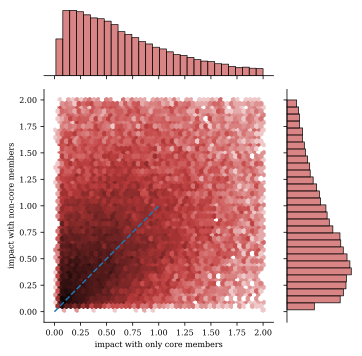

In [57]:
# #         impact_onlycore[gsize].append(np.mean(x[x>0]))
# impact_withnoncore[gsize]
# impact_onlycore[gsize]
import seaborn as sns
import matplotlib
dfplot=pd.DataFrame()
for gsize in range(4,5):
    x=np.array(impact_withnoncore[gsize])
    y=np.array(impact_onlycore[gsize])
    ind=np.where((~np.isnan(x))&  (~np.isnan(y))&  (y<2) &(x<2))[0]
    dfplot=pd.DataFrame([x[ind] ,y[ind]])
dfplot=dfplot.T
dfplot.columns=['impact with only core members','impact with non-core members']
# sns.set_style('white')  # Set the style to 'whitegrid'
        
# fig = plt.figure(figsize=(6,3))
kdeplot = sns.jointplot(x=dfplot['impact with only core members'],y=dfplot['impact with non-core members'],data=dfplot, kind="hex", color='indianred',norm=matplotlib.colors.LogNorm(),
                       height=5, ratio=3,marginal_kws=dict(bins=30))


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x= x[ind].reshape(-1, 1)
y =y[ind].reshape(-1, 1)
regressor.fit(x, y)
# Create the plot with a dashed line style
a = range(0, 2)
b = a

plt.plot(a, b, linestyle='--', label='x = y')
# regressor.fit(x, y)
# y_pred = regressor.predict(x)
# sns.lineplot(x=x[:, 0], y=y_pred[:, 0], color='white', label='Regression Line')


In [58]:
np.sum(dfplot['impact with only core members']>dfplot['impact with non-core members'])/dfplot.shape[0]

0.4381936666327258

In [59]:
np.sum(dfplot['impact with only core members']<dfplot['impact with non-core members'])/dfplot.shape[0]

0.5604062722736992

In [48]:
impact_ratio[gsize]=np.array(impact_ratio[gsize])
X=impact_ratio[gsize][~np.isnan(impact_ratio[gsize])]

# from scipy import stats
# for it in range(100000):
#     if len(c5_core_papers[gsize][it])>10:
# #         print(team_broadness[gsize][it],team_diversity[gsize][it],c5_core_papers[gsize][it])
#         res = stats.spearmanr(team_diversity[gsize][it],c5_core_papers[gsize][it])
#         print(res)
# knowledge_broadness[gsize]
np.sum(X>1)/len(X)

KeyError: 6

0.6108486724222186

In [ ]:
plt.hist(X[X<3])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
TB=np.concatenate(team_broadness[gsize])        
TD=np.concatenate(team_diversity[gsize])
C5_=np.concatenate(c5_core_papers[gsize])

# Creating a DataFrame

# Dividing 'knowledge_broadness' into 4 quantiles
df['knowledge_broadness_quantile'] = pd.cut(df['knowledge_broadness'], 6, labels=False)

# Plotting the boxplots
plt.figure(figsize=(2, 4))
sns.boxplot(x='knowledge_broadness_quantile', y='c5', data=df,showfliers=False)
plt.title('Boxplot of c5[gsize] for Each Quantile of Knowledge Broadness')
plt.xlabel('Knowledge Broadness Quantile')
plt.ylabel('c5[gsize]')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4']);


In [ ]:
df = pd.DataFrame({'knowledge_broadness': TB, 'c5': C5_})

# Dividing 'knowledge_broadness' into 4 quantiles
df['knowledge_broadness_quantile'] = pd.cut(df['knowledge_broadness'], 6, labels=False)
Q=df['knowledge_broadness_quantile']


([<matplotlib.axis.XTick at 0x7f3cd6e6bc10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

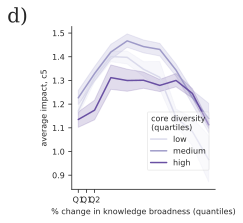

In [443]:
label_ff = 20;ff = 20;aa=14;bb=3;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));legendfff=10
falph=.35
spec = gridspec.GridSpec(ncols=4, nrows=1,width_ratios=[1,.6,.8,1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
sns.set_style("ticks")
taxX=-.45
#____________________________________________
# _______________
ax = fig.add_subplot(spec[3])

df = pd.DataFrame({'knowledge_broadness': TB, 'diversity': TD,'c5': C5_})
c5='c5'


from scipy.stats import spearmanr

# df = dfplot.reset_index()
# Create categories for knowledgebroadness
L=9;L2=3
# df['knowledgebroadness_'] = pd.qcut(df['knowledge_broadness'], L, labels=[(i-.5)/L for i in range(1,L+1)])
df['knowledgebroadness_'] = pd.qcut(df['knowledge_broadness'], L, labels=['Q'+str(i) for i in range(1,L+1)])
df['diversity'] = pd.qcut(df['diversity'], L2, labels=['low','medium','high'])
# df['corediversity_'] = pd.qcut(df['corediversity'], L2, labels==[i for i in range(1,L2+1)])
# labels = 'Low', 'Medium', 'High'
# df['labels'] = pd.qcut(df['x'], len(labels), labels=labels)

# ax=sns.boxplot(x='knowledgebroadness_', y=c5,hue='corediversity_' ,data=df,showfliers=False)
# ax=sns.boxplot(x='corediversity_', y=c5,hue='knowledgebroadness_' ,data=df,showfliers=False)
ax=sns.lineplot(x='knowledgebroadness_', y=c5,hue='diversity' ,data=df,palette=sns.color_palette("Purples",L2))
# ax=sns.lineplot(x='knowledgebroadness_', y=c5 ,data=df,palette=sns.color_palette("Purples",L2))

sns.despine(ax=ax)
plt.ylabel('average impact, c5')
plt.xlabel('% change in knowledge broadness (quantiles)')
leg=plt.legend(title='additional diversity\n(quantiles)',framealpha=falph,loc= 'upper left', bbox_to_anchor=(.5, .5),prop={'size': legendfff-2},ncol=1)
leg.set_title('core diversity\n(quartiles)',prop={'size': legendfff-2})
# plt.legend(loc='upper left', bbox_to_anchor=(.9, 1),fontsize=legendff,ncol=1)
ax.text(taxX, 1.0, 'd)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.xticks([0,.5,1])


# Literature popularity, depth, breadth

In [ ]:
with open(path_career+'dict_literaturepopularity.pkl', 'rb') as f:
    dict_literaturepopularity=pickle.load(f)
with open(path_career+'dict_literaturedepth.pkl', 'rb') as f:
    dict_literaturedepth=pickle.load(f)
with open(path_career+'dict_literaturebreadth.pkl', 'rb') as f:
    dict_literaturebreadth=pickle.load(f)

In [ ]:
t_ic = time.time();
for gsize in range(2,10):
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    litB=[dict_literaturebreadth[x]  if x in dict_literaturebreadth.keys() else np.nan for x in papers_by_team]
    litB=np.array(litB)

    with open(path_career+'significant_cores(litBreadth)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litB, f) 
        
    litD=[dict_literaturedepth[x]  if x in dict_literaturedepth.keys() else np.nan for x in papers_by_team]
    litD=np.array(litD)

    with open(path_career+'significant_cores(litDepth)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litD, f) 
    litP=[dict_literaturepopularity[x]  if x in dict_literaturepopularity.keys() else np.nan for x in papers_by_team]
    litP=np.array(litP)

    with open(path_career+'significant_cores(litPopularity)'+str(gsize)+'_time_ordered.pkl', 'wb') as f:
        pickle.dump(litP, f) 
        


In [ ]:
plt.hist(litD,bins=100);